In [9]:
import numpy as np
import random

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

import matplotlib.pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format = 'svg'

 ### Task 1 - Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [10]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [11]:
def mean_squared_error(y, prediction):
    return (sum((y - prediction)**2)) / len(y)

In [12]:
def bias(y, z):
    return (y - z)

In [13]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [14]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [15]:
def get_error_plot(n_trees, train_error, test_error):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_error, label='train error')
    plt.plot(list(range(n_trees)), test_error, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [16]:
X, y = load_diabetes(return_X_y=True)

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [14]:
n_trees = 10
coefs = [1] * n_trees
max_depth = 3
eta = 1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [15]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1171.6952061623913
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4784.165747080225


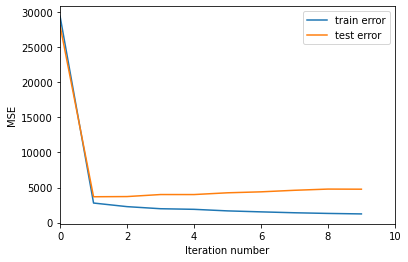

In [16]:
get_error_plot(n_trees, train_errors, test_errors)

In [17]:
def evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    error_train = mean_squared_error(y_train, train_prediction)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    error_test = mean_squared_error(y_test, test_prediction)
    return error_train, error_test

In [18]:
def get_error_plot_mod(n, errs, labels, x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(0, n)
    for i in range(len(errs)):
        plt.plot(list(range(n)), errs[i], label=labels[i])
    plt.legend(loc='upper right')
    plt.show()

Тренировочные данные


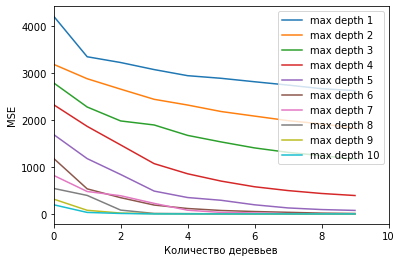

Тестовые данные


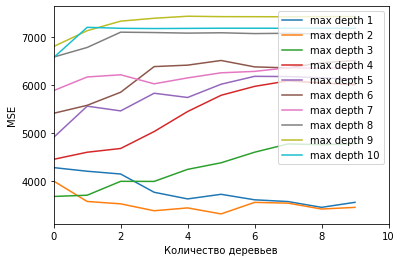

In [19]:
eta = 1
errs_train = []
errs_test = []
labels = []

for max in range(1, 11):
    labels.append(f'max depth {max}')
    errors_train = []
    errors_test = []
    for n in range(1, 11):
        coefs = [1] * n
        trees, train_errors, test_errors = gb_fit(n, max, X_train, X_test, y_train, y_test, coefs, eta)
        error_train, error_test = evaluate_alg_mod(X_train, X_test, y_train, y_test, trees, coefs, eta)
        errors_train.append(error_train)
        errors_test.append(error_test)
    errs_train.append(errors_train)
    errs_test.append(errors_test)

print('Тренировочные данные')
get_error_plot_mod(n, errs_train, labels, 'Количество деревьев', 'MSE')
print('Тестовые данные')
get_error_plot_mod(n, errs_test, labels, 'Количество деревьев', 'MSE')

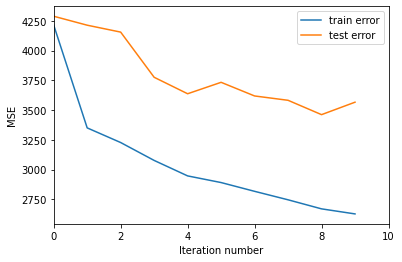

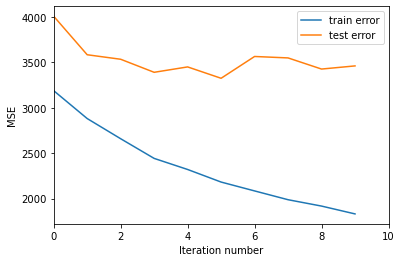

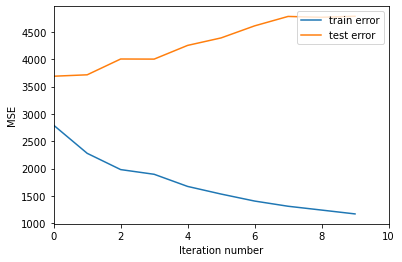

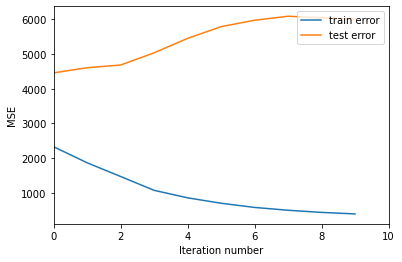

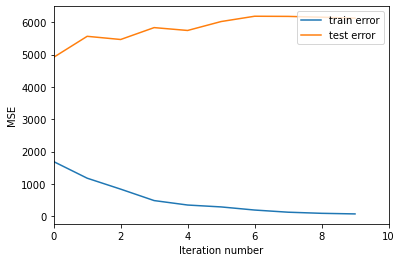

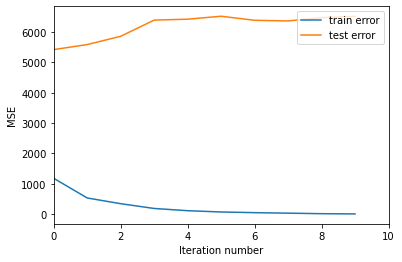

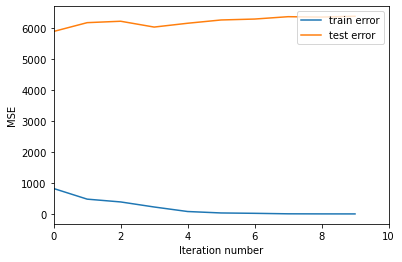

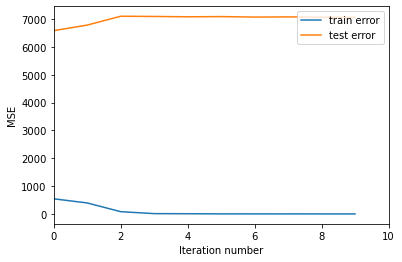

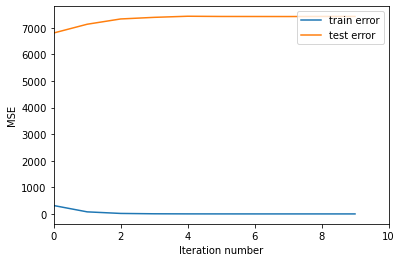

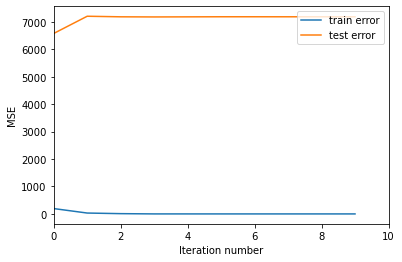

In [26]:
for i in range(10):
    get_error_plot(10, errs_train[i], errs_test[i])

#### Вывод: при увеличение кол-во деревьев и глубины увеличивается переобучение.

### Task 2 *. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [18]:
random.seed(42)
 
def get_bootstrap(X, y):
    n_samples = X.shape[0]
    n_samples_half = n_samples//2
    X_data = np.zeros((n_samples_half, X.shape[1]))
    y_data = np.zeros(n_samples_half)
    
    for j in range(n_samples_half): 
        sample_index = random.randint(0, n_samples-1)
        X_data[j] = X[sample_index]
        y_data[j] = y[sample_index]

    return X_data, y_data

In [24]:
def gb_fit_sgd(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    #сохраним полный трейн набор
    X_train_copy = X_train.copy()
    y_train_copy = y_train.copy()
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        #берем случайную половину от всей выборки трейна для стохастичности
        X_train, y_train = get_bootstrap(X_train_copy, y_train_copy)
        
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [25]:
n_trees = 30
eta = 0.1
coefs = [1] * n_trees
max_depth = 3
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
trees_sgd, train_errors_sgd, test_errors_sgd = gb_fit_sgd(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

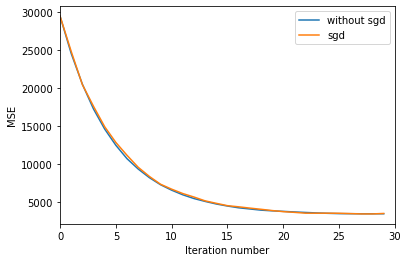

In [26]:
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), test_errors, label='without sgd')
plt.plot(list(range(n_trees)), test_errors_sgd, label='sgd')
plt.legend(loc='upper right')
plt.show()